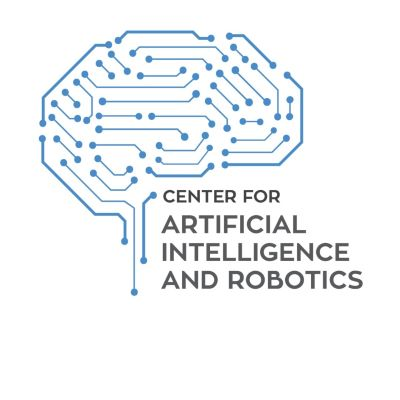

# Linear Regression Exercise

<div style="direction:rtl">
تبریک می گوییم! شما به تازگی با یک شرکت تجارت الکترونیکی مستقر در شهر نیویورک که به صورت آنلاین لباس می فروشد ، قرارداد بسته اید.
<div style="direction:rtl"> 
طرز کار این شرکت به این شکل است که جلسات مشاوره ای حضوری برای مشاوره دادن به مشتریان برگزار می کند و پس از جلسه، مشتری از طریق اپلیکیشن یا وب سایت سفارش خود را ثبت می کند.
<div style="direction:rtl"> 
این شرکت در تلاش است تا تصمیم بگیرد که روی اپلیکیشن تلفن همراه سرمایه گذاری بیشتری انجام دهد یا وب سایت. آنها شما را در قراردادی استخدام کرده اند تا به آنها کمک کند این موضوع را دریابند!
<div style="direction:rtl">    
بیا شروع کنیم!

# Imports

<div style="direction:rtl">
کتاب خانه های مورد نیاز را ایمپورت کنید. (کتاب خانه ی سایکیت لرن و متد های مربوط به آن را جلوتر و در طول حل تمرین آپلود می کنیم)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Get the Data

<div style="direction:rtl">
دیتا را در دیتافریمی به اسم customers بخوانید.
<div style="direction:rtl">
این دیتاست شامل اطلاعات زیر می باشد :
<div style="direction:rtl">
Email : ایمیل
<div style="direction:rtl">
Address : آدرس
<div style="direction:rtl">
Avatar : رنگ پروفایل
<div style="direction:rtl">
Avg. Session Length : میانگین طول جلسات مشاوره
<div style="direction:rtl">
Time on App : میانگین تایم گذرانده شده در اپلیکشین بعد از جلسه
<div style="direction:rtl">
Time on Website : میانگین تایم گذرانده شده در سایت بعد از جلسه
<div style="direction:rtl">
Length of Membership : تعداد سال های اشتراک مشتری
<div style="direction:rtl">
Yearly Amount Spent :  میانگین مبلغ خرید در یک سال        

In [2]:
customers = pd.read_csv('Ecommerce Customers.txt')

<div style="direction:rtl">
نگاه خلاصه به داده های دیتاست :

In [11]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<div style="direction:rtl">
بررسی اطلاعات دیتاست به صورت کلی :

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


<div style="direction:rtl">
بررسی اطلاعات آماری دیتاست به صورت کلی :

In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis (EDA)

<div style="direction:rtl">
حالا کمی به اکتشاف و جست و جو در دیتاست بپردازیم:

<div style="direction:rtl">
یک jointplot برای میانگین خرید سالانه بر حسب تایم گذرانده شده در وب سایت ترسیم نماید.
<div style="direction:rtl">
از استایل whitegrid و پالت GnBu_d برای این ترسیم استفاده کنید.

In [19]:
sns.set_style(style='whitegrid')
sns.set_palette("GnBu_d")


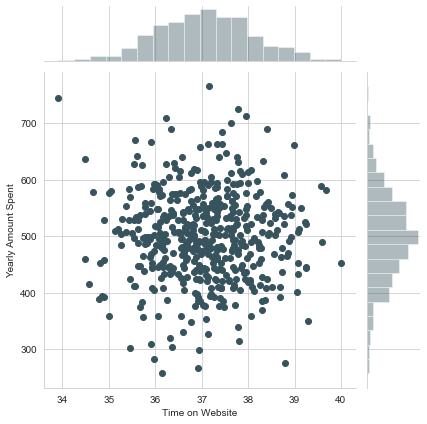

In [25]:
sns.jointplot(x = "Time on Website" , y = 'Yearly Amount Spent', data=customers)

<div style="direction:rtl">
همین ترسیم را برای میانگین زمان مصرف شده در اپلیکیشن انجام دهید.

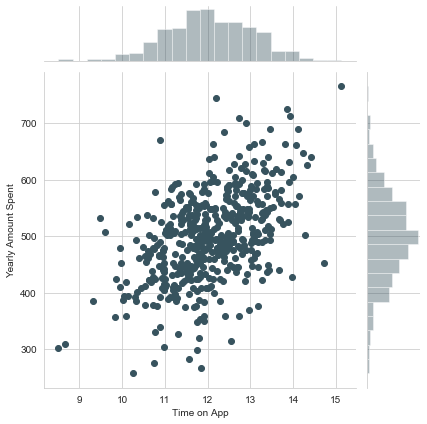

In [26]:
sns.jointplot(x = "Time on App" , y = 'Yearly Amount Spent', data=customers)

<div style="direction:rtl">
چه نتیجه ای می گیرید؟

<div style="direction:rtl">
نتیجه می گیریم که :

<div style="direction:rtl">
یک پلات هگز به همراه هیستوگرام ها برای مدت زمان اشتراک و عضویت مشتریان بر حسب مدت زمان استفاده از وبسایت ترسیم کنید.

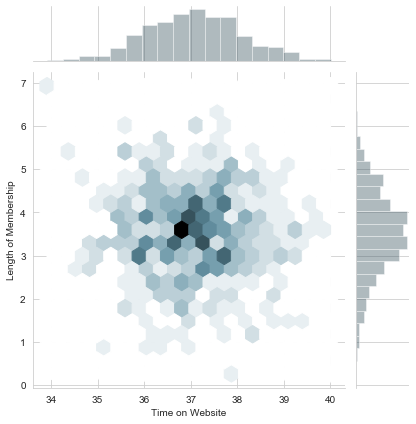

In [27]:
sns.jointplot(x = "Time on Website" , y = 'Length of Membership', data=customers,kind="hex")

<div style="direction:rtl">
همین ترسیم را برای میانگین زمان مصرف شده در اپلیکیشن انجام دهید.

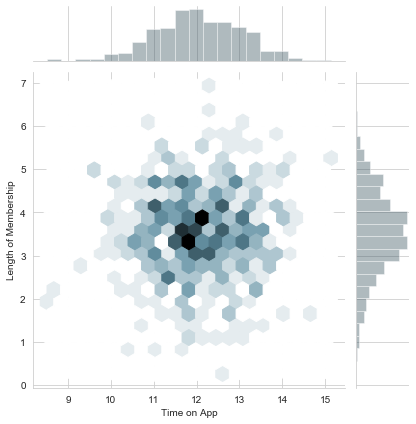

In [28]:
sns.jointplot(x = "Time on App" , y = 'Length of Membership', data=customers,kind="hex")

<div style="direction:rtl">
چه نتیجه ای می گیرید؟

<div style="direction:rtl">
نتیجه می گیریم که :

<div style="direction:rtl">
یک pairplot برای این دیتاست رسم نمایید.

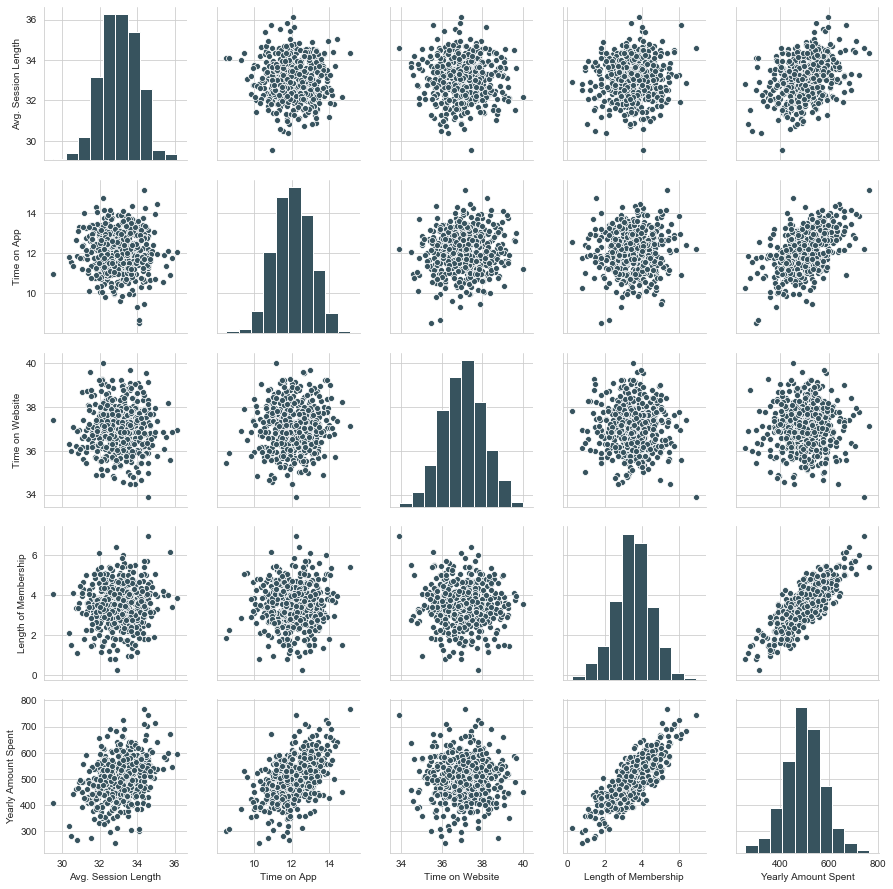

In [29]:
sns.pairplot(customers)

<div style="direction:rtl">
بر اساس نمودار های بالا، کدام فیچر بیشترین تاثیر را روی میزان خرید سالیانه دارد؟

<div style="direction:rtl">
موثر ترین فیچر : به عنوان لیبل میتوان 

<div style="direction:rtl">
یک خط به داده های میزان خرید بر حسب مدت زمان اشتراک فیت کنید.

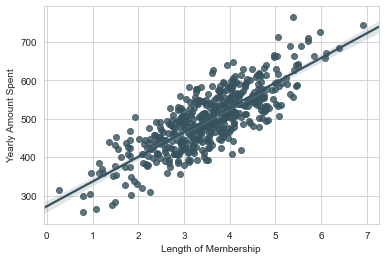

In [4]:
sns.regplot(x="Length of Membership", y="Yearly Amount Spent", data= customers);
#
#sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data= customers);

# Training and Testing Data

<div style="direction:rtl">
خب حالا داده های را به دو بخش فیچر ها (X) و لیبل (y) تقسیم کنید.

In [4]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [9]:
y = customers["Yearly Amount Spent"]
x = customers[["Avg. Session Length", "Time on App", "Length of Membership"]]


<div style="direction:rtl">
حالا با استفاده از متد train_test_split از کتابخانه و بخش sklearn.model_selection  فیچر ها و لیبل ها را به دو بخش ترین (70 درصد)  و بخش تست (30 درصد) با رندوم استیت 101(برای مشابه شدن نتایج) تقسیم کنید. 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xTrain , xTest , yTrain , yTest = train_test_split(x, y, test_size = 0.30, random_state = 101)

# Training the Model

<div style="direction:rtl">
حالا وقت آموزش دادن مدلمان است.
<div style="direction:rtl">
از sklearn.linear_model کلاس LinearRegression را ایمپورت کنید.

In [3]:
from sklearn.linear_model import LinearRegression

<div style="direction:rtl">
یک مدل رگرسیون خطی از کلاسی که ایمپورت کردید بسازید و نام آن را lm بگذارید.

In [13]:
lm = LinearRegression()

<div style="direction:rtl">
مدلی که ساختید را با داده های ترین آموزش دهید.

In [14]:
lm.fit(xTrain , yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting Test Data

<div style="direction:rtl">
خب حالا که مدل را آموزش دادیم، می توانیم از امکاناتی که مدل به ما می دهد استفاده کنیم تا نتیجه گیری کنیم، اما قبل از آن باید صحت مدل را بررسی کنیم. برای این کار یک پردیکشن روی داده های تست انجام می دهیم و بعد از آن بررسی می کنیم که این مدل تا چه حد روند های موجود در این دیتاست برای تاثیر در میزان خرید نهایی را استخراج کرده است.

<div style="direction:rtl">
مبلغ خرید نهایی را برای داده های تست پیش بینی کنید :

In [15]:
predic = lm.predict(xTest)

# Evaluating the Model

<div style="direction:rtl">
یک پلات اسکتر برای مقادیر واقعی خرید و مقادیر پیش بینی شده ترسیم کنید. می دانیم که اگر این مقادیر به هم نزدیک باشند، یعنی x=y و یک خط 45 درجه را مشاهده خواهیم کرد.

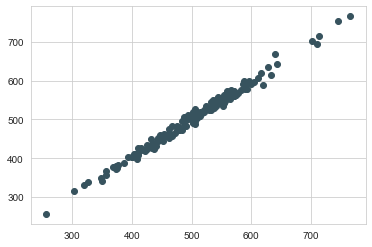

In [20]:
plt.scatter(yTest , predic)

<div style="direction:rtl">
مقادیر خطاهای Mean Absolute Error، Mean Squared Error و the Root Mean Squared Error  را برای این پیش بینی به دست آورید.
<div style="direction:rtl">
می دانیم که میانگین مبلغ خرید مقدار زیر می باشد:

In [21]:
customers['Yearly Amount Spent'].mean()

499.3140382585909

<div style="direction:rtl">
و برای این مبلغ 500 دلاری، خطای مطلق (MAE) کمتر از 10 دلار یعنی خطای کمتر از 2 درصد که عالیست.

<div style="direction:rtl">
این معیار ها را می توانید از ماژول metrics از ماژول sklearn استخراج کنید.

In [26]:
from sklearn import metrics
print('MAE : ', metrics.mean_absolute_error(yTest,predic))
print('MSE : ', metrics.mean_squared_error(yTest,predic))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(yTest,predic)))

MAE :  7.2369490560914
MSE :  80.19544609397676
RMSE :  8.955191013818563


MAE: 7.228148653430835
MSE: 79.81305165097467
RMSE: 8.933815066978646


# Residuals

<div style="direction:rtl">
در مرحله ی آخر از ارزیابی مدل، یک نمودار توزیع آماری برا Residuals یا همان تفاضلات مقادیر واقعی و پیش بینی شده ترسیم کنید و مطمئن شوید که شکل نرمالی دارند و مشکل خاصی در پیش بینی های ما وجود ندارد.

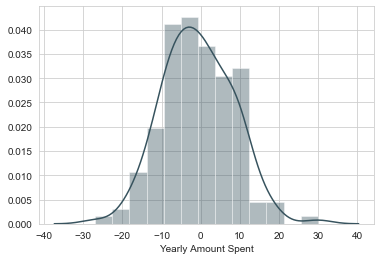

In [27]:
sns.distplot((yTest-predic))

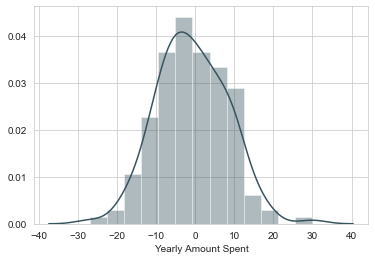

# Conclusion

<div style="direction:rtl">
خب خب، تمام مراحل بالا برای این بود که از صحت و دقیق بودن مدل رگرسیون خطی مان مطمئن شویم. حالا که متوجه شدیم این مدل به خوبی و درستی با داده های ما فیت شده و روی آن ها آموزش دیده و تمام معیار های ارزیابی رای به صحت مدل می دهدند، می توانیم از امکاناتی که این مدل بعد از آموزش روی داده ها به ما می دهد استفاده کنیم و طبق آن به نتیجه ی دلخواهمان برسیم. یکی از مهم ترین این امکانات، کوئفیشنت می باشد.

<div style="direction:rtl">
جدول زیر را تشکیل دهید و کوئفشینت های هر فیچر را به دست آورید.

In [34]:
c = pd.DataFrame(lm.coef_ , x.columns)
c.columns = ['c']
c

,c
Avg. Session Length,25.987591
Time on App,38.609413
Length of Membership,61.269046


,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


<div style="direction:rtl">
 از جدول بالا چه نتیجه ای می گیرید؟

<div style="direction:rtl">
نتیجه می گیریم که :

<div style="direction:rtl">
حالا به کمک اطلاعاتی که مدل آموزش داده شده روی داده های ما به ما داد، فکر می کنید این شرکت باید روی کدام قسمت سرمایه گذاری بیشتری انجام دهد؟

<div style="direction:rtl">
تحلیل خود را در این بخش بنویسید :